In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import streamlit as st
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/content/Financial_inclusion_dataset.csv')

In [3]:
data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None
               year  household_size  age_of_respondent


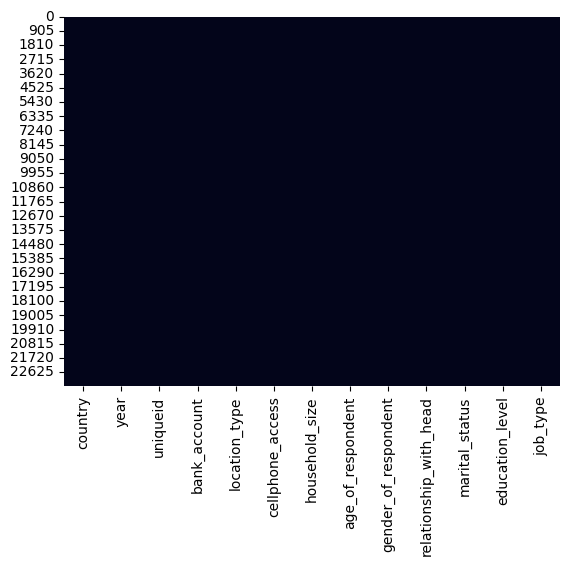

In [4]:
# Display basic information
print(data.info())
print(data.describe())

# Check for null values
print(f"desplaying messing values :\n{data.isnull().sum()}")

# Check for duplicate rows
print(f"duplecated rows : {data.duplicated().sum()}")

# Visualize missing data
sns.heatmap(data.isnull(), cbar=False)
plt.show()

In [ ]:
# EDA using ProfileReport
profile = ProfileReport(data, title="Financial Inclusion Dataset Report")
profile.to_file("financial_inclusion_report.html")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
#spliting data into categorical and numerical featurs
categorical_features = data.select_dtypes(include=['object']).columns
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns

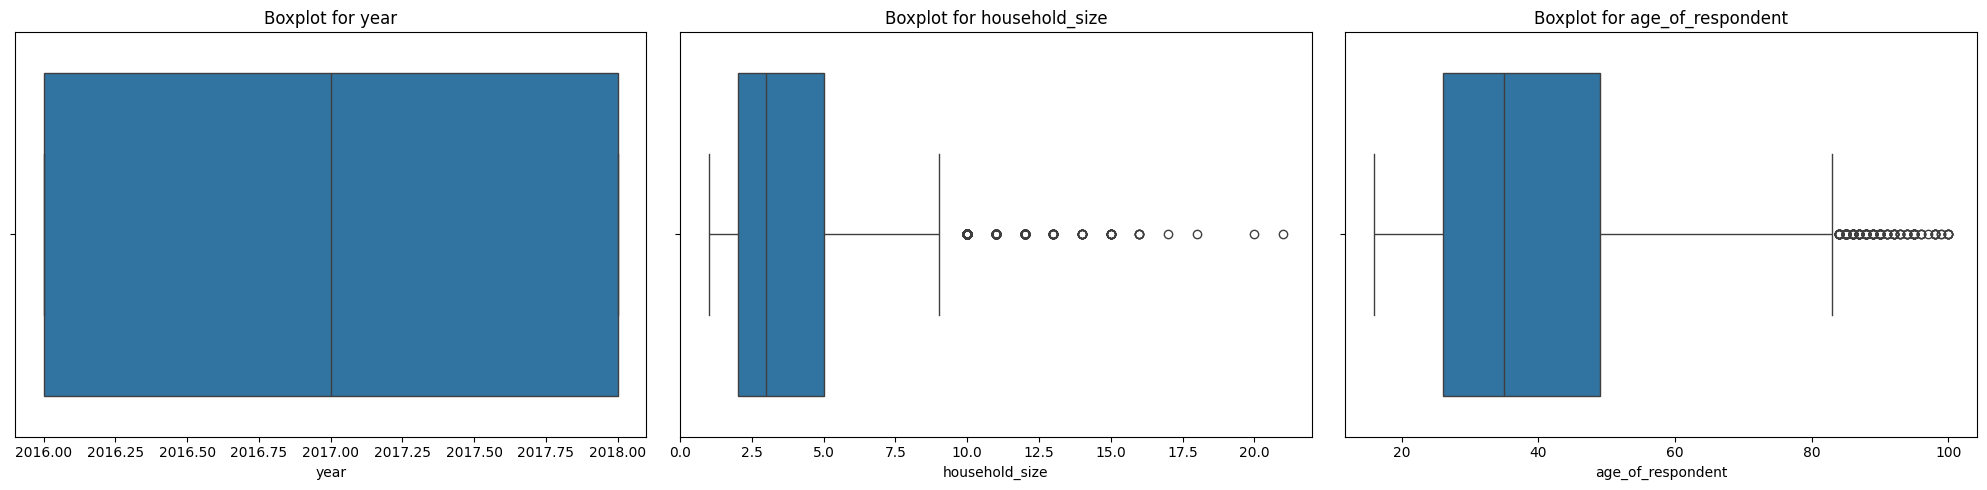

(23524, 13)

In [6]:
# cheking for the presance of the outliers in the numerical featurs

def checking_of_outliers(numerical_data):
    numerical_columns = numerical_data.columns
    n_cols = 3  # Number of columns for subplots
    n_rows = (len(numerical_columns) + n_cols - 1) // n_cols  # Calculate rows needed

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easier iteration

    for i, col in enumerate(numerical_columns):
        sns.boxplot(x=numerical_data[col], ax=axes[i])
        axes[i].set_title(f"Boxplot for {col}")

    # Remove any unused subplots
    for j in range(len(numerical_columns), len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

# Usage example
checking_of_outliers(numerical_data=data[numerical_features])
data.shape

In [7]:
# removing the outliears
# Define a function to remove outliers using the IQR method
import pandas as pd

def remove_outliers_iqr(df, column_names):
    """
    Removes outliers from specified columns in the DataFrame using the IQR method.

    Parameters:
    - df: pandas DataFrame containing the data.
    - column_names: list of column names from which to remove outliers.

    Returns:
    - df_cleaned: DataFrame with outliers removed from the specified columns.
    """
    df_cleaned = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly

    for column_name in column_names:
        # Calculate the first and third quartiles
        Q1 = df_cleaned[column_name].quantile(0.25)
        Q3 = df_cleaned[column_name].quantile(0.75)

        # Calculate the IQR
        IQR = Q3 - Q1

        # Define the lower and upper bounds for outliers
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Remove the outliers from the specific column
        df_cleaned = df_cleaned[(df_cleaned[column_name] >= lower_bound) & (df_cleaned[column_name] <= upper_bound)]

    return df_cleaned
col = ['household_size','age_of_respondent']
df_cleaned = remove_outliers_iqr(data, col)



In [8]:
# Display basic information
print(df_cleaned.info())
print(df_cleaned.describe())

# Check for null values
print(f"desplaying messing values :\n{df_cleaned.isnull().sum()}")

<class 'pandas.core.frame.DataFrame'>
Index: 22902 entries, 0 to 23522
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 22902 non-null  object
 1   year                    22902 non-null  int64 
 2   uniqueid                22902 non-null  object
 3   bank_account            22902 non-null  object
 4   location_type           22902 non-null  object
 5   cellphone_access        22902 non-null  object
 6   household_size          22902 non-null  int64 
 7   age_of_respondent       22902 non-null  int64 
 8   gender_of_respondent    22902 non-null  object
 9   relationship_with_head  22902 non-null  object
 10  marital_status          22902 non-null  object
 11  education_level         22902 non-null  object
 12  job_type                22902 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.4+ MB
None
               year  household_size  age_of_respondent
count

In [9]:
# desplaying informations about categorical featurs
columns = data[categorical_features].columns.to_list()
for col in columns:
    print(f"Column: {col}")
    print(data[col].value_counts().to_dict())
    print(("-" * 40))

data[categorical_features].apply(lambda x : x.nunique())

Column: country
{'Rwanda': 8735, 'Tanzania': 6620, 'Kenya': 6068, 'Uganda': 2101}
----------------------------------------
Column: uniqueid
{'uniqueid_1': 4, 'uniqueid_1413': 4, 'uniqueid_1411': 4, 'uniqueid_1410': 4, 'uniqueid_1409': 4, 'uniqueid_1408': 4, 'uniqueid_1407': 4, 'uniqueid_1406': 4, 'uniqueid_1405': 4, 'uniqueid_1404': 4, 'uniqueid_1403': 4, 'uniqueid_1402': 4, 'uniqueid_1401': 4, 'uniqueid_1400': 4, 'uniqueid_1399': 4, 'uniqueid_1398': 4, 'uniqueid_1397': 4, 'uniqueid_1396': 4, 'uniqueid_1395': 4, 'uniqueid_1394': 4, 'uniqueid_1393': 4, 'uniqueid_1392': 4, 'uniqueid_1391': 4, 'uniqueid_1390': 4, 'uniqueid_1389': 4, 'uniqueid_1388': 4, 'uniqueid_1387': 4, 'uniqueid_1386': 4, 'uniqueid_1385': 4, 'uniqueid_1384': 4, 'uniqueid_1383': 4, 'uniqueid_1412': 4, 'uniqueid_1414': 4, 'uniqueid_1381': 4, 'uniqueid_1415': 4, 'uniqueid_1444': 4, 'uniqueid_1443': 4, 'uniqueid_1442': 4, 'uniqueid_1441': 4, 'uniqueid_1440': 4, 'uniqueid_1439': 4, 'uniqueid_1438': 4, 'uniqueid_1437': 4, 'u

,0
country,4
uniqueid,8735
bank_account,2
location_type,2
cellphone_access,2
gender_of_respondent,2
relationship_with_head,6
marital_status,5
education_level,6
job_type,10


In [10]:
# transforming the job title column to reduce the high cardinality effect
df = df_cleaned.copy()
# Mapping dictionary for job types
job_type_mapping = {
    'Self employed': 'Self employed',
    'Informally employed': 'Informally employed',
    'Farming and Fishing': 'Farming and Fishing',
    'Formally employed Private': 'Formally employed',
    'Formally employed Government': 'Formally employed',
    'Remittance Dependent': 'Low Income/Dependent',
    'No Income': 'Low Income/Dependent',
    'Government Dependent': 'Low Income/Dependent',
    'Other Income': 'Other',
    'Dont Know/Refuse to answer': 'Other'
}

# Apply mapping
df['job_type_grouped'] = df['job_type'].map(job_type_mapping)

# Check results

df.drop(columns=['job_type','uniqueid'], inplace=True)
df

,country,year,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type_grouped
0,Kenya,2018,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Low Income/Dependent
2,Kenya,2018,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed
4,Kenya,2018,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
...,...,...,...,...,...,...,...,...,...,...,...,...
23518,Uganda,2018,No,Rural,Yes,9,20,Female,Child,Single/Never Married,Primary education,Low Income/Dependent
23519,Uganda,2018,No,Rural,Yes,4,48,Female,Head of Household,Divorced/Seperated,No formal education,Other
23520,Uganda,2018,No,Rural,Yes,2,27,Female,Head of Household,Single/Never Married,Secondary education,Other
23521,Uganda,2018,No,Rural,Yes,5,27,Female,Parent,Widowed,Primary education,Other


In [11]:
categorical_features = df.select_dtypes(include=['object']).columns
df[categorical_features].apply(lambda x : x.nunique())

,0
country,4
bank_account,2
location_type,2
cellphone_access,2
gender_of_respondent,2
relationship_with_head,6
marital_status,5
education_level,6
job_type_grouped,6


In [12]:
# encoding the categorical featurs part2 (one_hot_encoding)

def create_pipeline(df, categorical_columns):
    """
    Create a pipeline for one-hot encoding categorical columns in the DataFrame.

    Parameters:
    - df: pandas DataFrame containing the data.
    - categorical_columns: List of categorical column names to encode.

    Returns:
    - pipeline: A scikit-learn pipeline for one-hot encoding the categorical columns.
    """
    # Create the column transformer for one-hot encoding
    column_transformer = ColumnTransformer(
        transformers=[
            ('onehot', OneHotEncoder(drop='first', sparse_output=False), categorical_columns) # sparse=False to produce array output
        ],
        remainder='passthrough'  # Keep other columns unchanged
    )

    # Create a pipeline with the column transformer
    pipeline = Pipeline(steps=[('onehot', column_transformer)])

    return pipeline

# make a copy of cleaned_df
df_ohc = df.copy()
# List of categorical columns
categorical_columns = categorical_features.tolist()  # Convert Index to list

# Assuming 'df' is your DataFrame
pipeline = create_pipeline(df_ohc, categorical_columns)

# Apply the pipeline to your data
df_transformed = pipeline.fit_transform(df_ohc)

# Get feature names after transformation
# Pass all original column names as input_features
transformed_feature_names = pipeline.named_steps['onehot'].get_feature_names_out(df_ohc.columns)

# Convert the result back to a DataFrame with correct column names
df_transformed = pd.DataFrame(df_transformed, columns=transformed_feature_names)

# Display the transformed DataFrame
print(df_transformed)

       onehot__country_Rwanda  onehot__country_Tanzania  \
0                         0.0                       0.0   
1                         0.0                       0.0   
2                         0.0                       0.0   
3                         0.0                       0.0   
4                         0.0                       0.0   
...                       ...                       ...   
22897                     0.0                       0.0   
22898                     0.0                       0.0   
22899                     0.0                       0.0   
22900                     0.0                       0.0   
22901                     0.0                       0.0   

       onehot__country_Uganda  onehot__bank_account_Yes  \
0                         0.0                       1.0   
1                         0.0                       0.0   
2                         0.0                       1.0   
3                         0.0                       0.0

In [13]:
df_transformed.head()

,onehot__country_Rwanda,onehot__country_Tanzania,onehot__country_Uganda,onehot__bank_account_Yes,onehot__location_type_Urban,onehot__cellphone_access_Yes,onehot__gender_of_respondent_Male,onehot__relationship_with_head_Head of Household,onehot__relationship_with_head_Other non-relatives,onehot__relationship_with_head_Other relative,...,onehot__education_level_Tertiary education,onehot__education_level_Vocational/Specialised training,onehot__job_type_grouped_Formally employed,onehot__job_type_grouped_Informally employed,onehot__job_type_grouped_Low Income/Dependent,onehot__job_type_grouped_Other,onehot__job_type_grouped_Self employed,remainder__year,remainder__household_size,remainder__age_of_respondent
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,3.0,24.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,5.0,70.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2018.0,5.0,26.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0,5.0,34.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2018.0,8.0,26.0


In [14]:
df_transformed.columns = df_transformed.columns.str.replace('^onehot__', '', regex=True)
df_transformed
df_transformed.rename(columns={'bank_account_Yes': 'having bank account'}, inplace=True)
df_transformed

,country_Rwanda,country_Tanzania,country_Uganda,having bank account,location_type_Urban,cellphone_access_Yes,gender_of_respondent_Male,relationship_with_head_Head of Household,relationship_with_head_Other non-relatives,relationship_with_head_Other relative,...,education_level_Tertiary education,education_level_Vocational/Specialised training,job_type_grouped_Formally employed,job_type_grouped_Informally employed,job_type_grouped_Low Income/Dependent,job_type_grouped_Other,job_type_grouped_Self employed,remainder__year,remainder__household_size,remainder__age_of_respondent
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2018.0,3.0,24.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,5.0,70.0
2,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2018.0,5.0,26.0
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,2018.0,5.0,34.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2018.0,8.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22897,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2018.0,9.0,20.0
22898,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018.0,4.0,48.0
22899,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018.0,2.0,27.0
22900,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2018.0,5.0,27.0


In [15]:
# concatinating dataframes preparing for the ml modeling
df.drop(categorical_features, axis=1, inplace=True)
df_ML = pd.concat([df, df_transformed], axis=1)
df_ML.isna().sum()

,0
year,572
household_size,572
age_of_respondent,572
country_Rwanda,572
country_Tanzania,572
country_Uganda,572
having bank account,572
location_type_Urban,572
cellphone_access_Yes,572
gender_of_respondent_Male,572


In [16]:
# droping the messing values
df_ML.dropna(inplace=True)
df_ML.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22330 entries, 0 to 22901
Data columns (total 32 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   year                                             22330 non-null  float64
 1   household_size                                   22330 non-null  float64
 2   age_of_respondent                                22330 non-null  float64
 3   country_Rwanda                                   22330 non-null  float64
 4   country_Tanzania                                 22330 non-null  float64
 5   country_Uganda                                   22330 non-null  float64
 6   having bank account                              22330 non-null  float64
 7   location_type_Urban                              22330 non-null  float64
 8   cellphone_access_Yes                             22330 non-null  float64
 9   gender_of_respondent_Male        

In [17]:
# spliting data for ML modeling using Random Forest Classifier
X = df_ML.drop(['having bank account'], axis=1)
y = df_ML['having bank account']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Evaluate feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns)
print("Feature Importances:")
print(feature_importances.sort_values(ascending=False))


Feature Importances:
remainder__age_of_respondent                       0.180633
age_of_respondent                                  0.175692
household_size                                     0.099089
remainder__household_size                          0.090633
job_type_grouped_Formally employed                 0.081715
education_level_Tertiary education                 0.041100
location_type_Urban                                0.034617
education_level_Vocational/Specialised training    0.032514
cellphone_access_Yes                               0.025515
education_level_Secondary education                0.021291
education_level_Primary education                  0.020447
gender_of_respondent_Male                          0.019845
job_type_grouped_Self employed                     0.019564
year                                               0.015505
relationship_with_head_Head of Household           0.015450
job_type_grouped_Informally employed               0.015122
marital_status_Marr

In [18]:
# Train Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluate
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.93      3877
         1.0       0.59      0.34      0.43       589

    accuracy                           0.88      4466
   macro avg       0.75      0.65      0.68      4466
weighted avg       0.86      0.88      0.87      4466

Accuracy: 0.8822212270488132


In [19]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))